## Table of Contents:  
#### O: Obtaining data and Organize project
1.1 [Load data, required packages, and suppress warnings](#O1)  
#### S: Cleaning data:  
2.1 [Missing Data and Interpolation](#S1)  
2.2 [Data Visualization, Skewness, and Transformation](#S2)  
2.3 [Time series: Seasonality and Categorical: Encoding](#S3)     
#### E: Exploratory Data Analysis:
3.1 [Feature Selection](#E2)  
3.2 [Feature Extraction](#E2)   
3.3 [Eliminate Outliers and Add Extra Features](#M1)   
#### M: Modeling Predictors and Classifiers
4.1 [Model Pipeline Test](#M1)  
4.2 [Time Series: ARIMA/ SARIMAX model](#M2)  
4.3 [Classification Model](#M3)  
4.4 [With Lagged Features](#M4)  
4.5 [Multiple Output Predictions](#M5)  
#### N: Report Findings and Summary
5.1 [Visualization](#N1)   
5.2 [Summary](#N1)  

<a id='O1'></a>

## O: Load weather data

O stands for Obtaining data and Organize your project!  
1. version control (Git)  
2. reproducible results (venv)  
3. Separating raw data, intermediate data, and final data (./data)  
4. Documenting work (ipynb)  
5. Separate modules for custom functions (./src) Pycharm  

Also suppress warnings  

In [523]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import glob

In [51]:
mypath = os.getcwd() + '\\daily-text'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = listdir('daily-text')


all_files = glob.glob(mypath + "/*")

li = []

for filename in all_files:
    try:
        df = pd.read_csv(filename, sep="\t|\n| |s+", comment='#', header = None, na_values='*',usecols=[0,1,2,3,4,5,6,7,8,9], error_bad_lines=False)
        #add file name as column
        df['date'] = filename
        li.append(df)
    except:
        print(filename, " is empty and has been skipped.")
df = pd.concat(li, axis=0, ignore_index=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2007_06_03  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2007_08_05  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2008_01_01  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2008_05_31  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2008_06_01  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2013_09_07  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2014_11_09  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2015_01_24  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\2015_12_03  is empty and has been skipped.
C:\Users\saiou\OneDrive\Documents\GitHub\Practice\daily-text\201

0     1     2     3       4    5   6      7    8      9  \
0  16:00  29.5  43.0  15.6  1013.0  1.4  SW  10.44  0.0  00:00   
1  16:30  30.5  36.0  14.0  1013.0  1.3  NW  10.94  0.0  00:00   
2  17:00  31.1  41.0  16.3  1013.0  1.2  NW  11.45  0.0  00:00   
3  17:30  32.2  43.0  18.1  1013.0  0.2  NW  11.95  0.0  00:00   
4  18:00  32.7  41.0  17.8  1013.0  0.8  SW  12.46  0.0  00:00   

                                                date  
0  C:\Users\saiou\OneDrive\Documents\GitHub\Pract...  
1  C:\Users\saiou\OneDrive\Documents\GitHub\Pract...  
2  C:\Users\saiou\OneDrive\Documents\GitHub\Pract...  
3  C:\Users\saiou\OneDrive\Documents\GitHub\Pract...  
4  C:\Users\saiou\OneDrive\Documents\GitHub\Pract...

In [55]:
df['date'] = df['date'].apply(lambda x: x.split('\\')[-1])
df['date'] = df['date'].apply(lambda x: ''.join([i for i in x if i.isdigit()]))
df['t'] = df['date'] +df[0]
df['t'] = df['t'].apply(lambda x: "".join(str(x).split(':')))
df['t'] = pd.to_datetime(df['t'],infer_datetime_format=True)

In [81]:
df['t'] = pd.to_datetime(df['t'],infer_datetime_format=True)

In [82]:
df.head()

0     1     2     3       4    5   6      7    8      9      date  \
0  16:00  29.5  43.0  15.6  1013.0  1.4  SW  10.44  0.0  00:00  19950630   
1  16:30  30.5  36.0  14.0  1013.0  1.3  NW  10.94  0.0  00:00  19950630   
2  17:00  31.1  41.0  16.3  1013.0  1.2  NW  11.45  0.0  00:00  19950630   
3  17:30  32.2  43.0  18.1  1013.0  0.2  NW  11.95  0.0  00:00  19950630   
4  18:00  32.7  41.0  17.8  1013.0  0.8  SW  12.46  0.0  00:00  19950630   

                    t  
0 1995-06-30 16:00:00  
1 1995-06-30 16:30:00  
2 1995-06-30 17:00:00  
3 1995-06-30 17:30:00  
4 1995-06-30 18:00:00

<a id='S1'></a>

## S: Clean time series data

df is our raw data compiliation with minimal processing  
A good practice is to safe df as pre-processed.csv  

S stands for Scrubbing/Cleaning data: Most important part of producing great work  
kjam repo:  
Initial data analysis: Not answering the research question yet!  

Deal with NaN: 
Use df.isnull().sum(): Decide to drop column or impute missing data 

Check Duplicate columns: 

If Duplication: use Dedupe  
If email: use beautifier  
If unicode: use ftfy  
If string matching: fuzzywuzzy  

In [118]:
df_pre = df[df['t'].notna()]
df_pre = df_pre.drop_duplicates(subset='t', keep='first')
dft = df_pre.set_index('t')
dft = dft.iloc[:,1:9]
dft.columns = ['Temp','Humid','DewPt','Press','WindSp','WindDr','Sun','Rain']

dft.interpolate(method='time', inplace=True)

Temp  Humid  DewPt   Press  WindSp WindDr    Sun  Rain
t                                                                          
1995-06-30 16:00:00  29.5   43.0   15.6  1013.0     1.4     SW  10.44   0.0
1995-06-30 16:30:00  30.5   36.0   14.0  1013.0     1.3     NW  10.94   0.0
1995-06-30 17:00:00  31.1   41.0   16.3  1013.0     1.2     NW  11.45   0.0
1995-06-30 17:30:00  32.2   43.0   18.1  1013.0     0.2     NW  11.95   0.0
1995-06-30 18:00:00  32.7   41.0   17.8  1013.0     0.8     SW  12.46   0.0

In [120]:
dft.isnull().sum()

Temp         55
Humid         0
DewPt         0
Press         0
WindSp        0
WindDr    18660
Sun           0
Rain          0
dtype: int64

In [121]:
dft.shape

(431206, 8)

In [128]:
rs = dft.resample('30min').bfill()[0:]
rs = pd.concat([rs, pd.get_dummies(rs['WindDr'], prefix='WindDr')], axis=1)
rs = rs.drop(columns=['WindDr'])
rs.isnull().sum()

Temp         53
Humid         0
DewPt         0
Press         0
WindSp        0
Sun           0
Rain          0
WindDr_E      0
WindDr_N      0
WindDr_NE     0
WindDr_NW     0
WindDr_S      0
WindDr_SE     0
WindDr_SW     0
WindDr_W      0
dtype: int64

<a id='S2'></a>

## S-E Explore data but not features

Quality of data: freuquency counts, stats (mean, std, median), normality (skewness, kurtosis, histogram)  

Common-method variance: variance from measurement method/ systematic error. Do CFA or Kock collinearity  

VIF: for non-ml, random forest, SVM we don't care about coef  

Quality of measurements: structure of measurement instruments with homogeniality  

Initial transformations: impute missing data or transform it  
1. differ slightly from normal:			Square root
2. differ greatly from normal:			Log
3. differ severely from normal:			Inverse
4. No transformation help:			Categorical

Do this before scale! We want it to look more like normal distributions

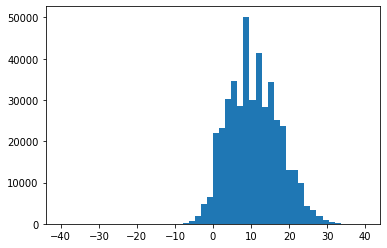

In [143]:
_ = plt.hist(rs['Temp'],bins=50)

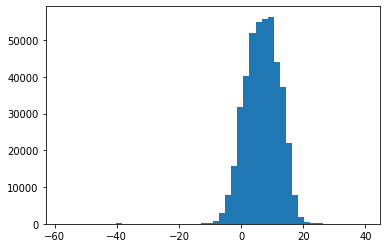

In [147]:
_ = plt.hist(rs['DewPt'],bins=50)

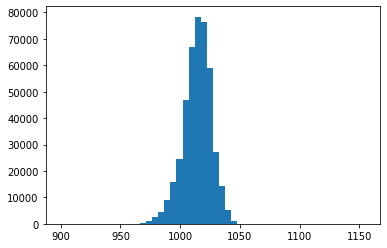

In [145]:
_ = plt.hist(rs['Press'],bins=50)

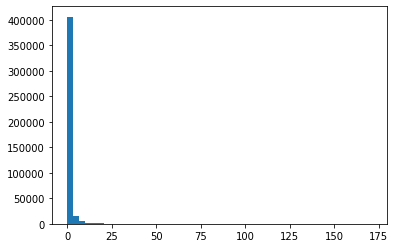

In [146]:
_ = plt.hist(rs['Rain'],bins=50)

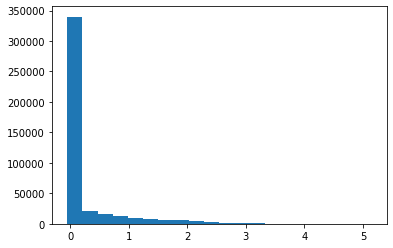

In [168]:
_ = plt.hist(np.log(rs['Rain']+1),bins=20)

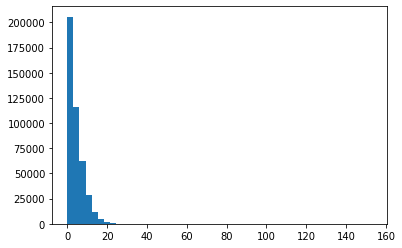

In [150]:
_ = plt.hist(rs['WindSp'],bins=50)

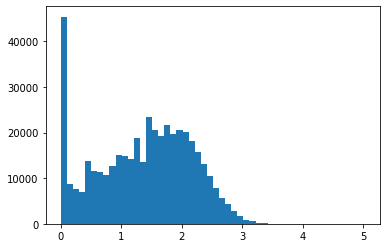

In [205]:
rs['WindSpl1p'] = np.log1p(rs['WindSp'])
_ = plt.hist(np.log1p(rs['WindSp']),bins=50)

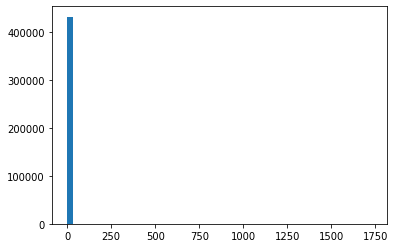

In [157]:
_ = plt.hist(rs['Sun'],bins=50)

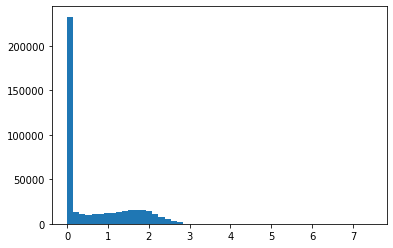

In [204]:
rs['Sunl1p'] = np.log1p(rs['Sun'])
_ = plt.hist(np.log1p(rs['Sun']),bins=50)

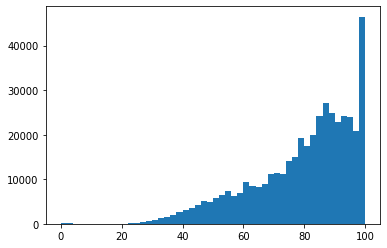

In [148]:
_ = plt.hist(rs['Humid'],bins=50)

In [162]:
np.sum(rs['Rain']==0)/rs['Rain'].shape[0]

0.6285356910001434

<a id='S3'></a>

## Time series data:

Use pd.to_datetime to convert to date time format. If data is too frequent, we can resample in larger unit eg. 30min to D. Check seasonality: Seasonality in temperature but not Rain  

## Categorical data:

Perform one hot encoding if no sense of progression in category with pd.get_dummies(df). PErform ordinal encoding if there is a clear progression e.g. very hot, hot, cold, very cold  

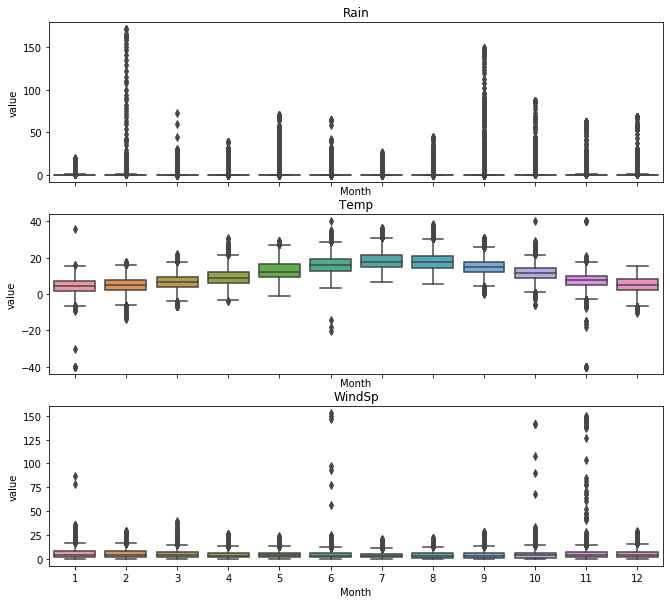

In [180]:
rs['Month'] = pd.DatetimeIndex(rs.index).month
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Rain', 'Temp', 'WindSp'], axes):
    sns.boxplot(data=rs, x='Month', y=name, ax=ax)
    ax.set_ylabel('value')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

<a id='M1'></a>

## E: Exploratory Data Analysis

Use scaler after transforming data: 
MinMaxScaler keeps spatial relation between different data the same while StandardScaler normalize the data to mean 0 std 1  

For time series data: check moving average. MACD etc. can be very informative compared to giving the algorithm 100 days lagged data (feature overload)

Dealing with Outliers: 
If normal dist: Z-score () <,>3	after preprocessing.scale(foo) or from scipy import stats np.abs(stats.zscore(boston_df))	

Otherwise if Skew: boxplot IQR score= Q3 − Q1 (Q1 - 1.5 * IQR) (Q3 + 1.5 * IQR)    							

In [563]:
rse = rs.resample('1D').mean()
X = rse.iloc[:-1, :]
y = rse['Rain'].shift(-1)
y = y[:-1]
rse.head()

Humid      DewPt        Press    WindSp        Sun      Rain  \
t                                                                              
1995-06-30  58.562500  14.712500  1014.437500  4.918750  13.449375  0.000000   
1995-07-01  69.937500  11.010417  1018.187500  3.072917   0.343542  0.000000   
1995-07-02  72.645833  10.252083  1009.187500  1.781250   0.000000  1.828333   
1995-07-03  76.520833  10.462500  1006.000000  1.887500   0.352292  0.004167   
1995-07-04  67.958333   9.804167  1014.020833  3.045833   3.111458  0.000000   

            WindDr_E  WindDr_N  WindDr_NE  WindDr_NW  WindDr_S  WindDr_SE  \
t                                                                           
1995-06-30       0.0  0.562500   0.125000     0.1875  0.000000   0.000000   
1995-07-01       0.0  0.145833   0.750000     0.0000  0.062500   0.041667   
1995-07-02       0.0  0.395833   0.520833     0.0625  0.000000   0.000000   
1995-07-03       0.0  0.354167   0.020833     0.2500  0.020833   0.000000   
1995-07-04       0.0  0.000000   0.000000     0.0000  0.041667   0.000000   

            WindDr_SW  WindDr_W  Month    Sunl1p  WindSpl1p  
t                                                            
1995-06-30   0.125000  0.000000      6  2.664999   1.550122  
1995-07-01   0.000000  0.000000      7  0.230105   1.250057  
1995-07-02   0.000000  0.000000      7  0.000000   0.903344  
1995-07-03   0.000000  0.000000      7  0.215035   0.746481  
1995-07-04   0.104167  0.791667      7  1.153518   1.170914

In [565]:
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression 

<a id='E2'></a>

## Feature selection/ Feature Extraction:

Curse of dimensionality: data high dimensional
1. Training time increases exponentially with number of features
2. Models have increasing risk of overfitting with increasing number of features.

Feature Selection: statistical tests in order to rank them according to their importance information loss and is less stable different test gives different importance score to features

Filter Methods		
1. F Test:	F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.	
	Least-square errors: sklearn.feature_selection.f_regression or sklearn.feature_selection.f_classif	
	Only captures linear relationship! High corr give high score but deceptive (Anscombe's Quartet non linear	
2. Mutual Info	If independent: 0, if deterministic 1	
	sklearn.feature_selection.mututal_info_regression  sklearn.feature_selection.mututal_info_classif	
	captures non-linear relationship	
3. Variance Threshold		when a feature doesn’t vary much within itself, it generally has very little predictive power.
	sklearn.feature_selection.VarianceThreshold	

Wrapper methods  
Recursive Feature Elimination  

Feature Extraction  
PCA/ multilinear PCA/ SVD  
Manifold Learning: Kernel PCA  
Nonlinear DR  
Factor Analysis  
Auto Encoders/ VAE  
t-distributed stochastic neighbor embedding (t-SNE): minimize sum of KL-div with gradient descent method  

EFA: Exploratory Factor Analysis  
R-type factor analysis
Q-type factor analysis


## Examplle pipeline:  
sklearn.pipeline.Pipeline  
clf = Pipeline([  
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])  
clf.fit(X, y)  


In [569]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [571]:
# Pass variance threshold
print(X.shape)
VarianceThreshold().fit_transform(X)
X_f = f_regression(X,y)
X_m = mutual_info_regression(X,y)
print(np.where(X_f[1] > 0.05))
print(np.where(X_m > 0.05))

(9011, 17)
(array([ 4,  6, 12], dtype=int64),)
(array([2, 5], dtype=int64),)


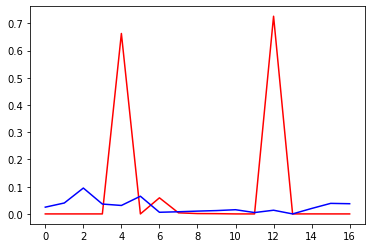

In [572]:
plt.plot(X_f[1],color ='red')
plt.plot(X_m,color ='blue')

In [574]:
print(rse.columns[[4,6,12]])
print(rse.columns[[2,5]])

Index(['Sun', 'WindDr_E', 'WindDr_SW'], dtype='object')
Index(['Press', 'Rain'], dtype='object')


Model: semi-supervised	  		
sklearn.semi_supervised	  
in your training data some of the samples are not labeled.  			
from sklearn.semi_supervised import LabelPropagation			 
from sklearn.semi_supervised import LabelSpreading			 

If we have labels only for some data


<a id='E3'></a>

## Example Scaling and outliers elimination

In [ ]:
# 1700 features are a lot!
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Lose minimum infomation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<a id='M1'></a>

## M: Modeling data to give predictive power:  
## Regression Attempts:  

Robust scaler to take out outlier  

Train test split, cross-validation. There is also TimeSeries Split  

Bagging SVM		
from sklearn.svm import SVC		
from sklearn.ensemble import BaggingClassifier		
	clf = BaggingClassifier(base_estimator=SVC(),	
	                        n_estimators=10, random_state=0).fit(X, y)	

sklearn.ensemble.RandomForestClassifier		
	from sklearn.ensemble import RandomForestClassifier	
	clf = RandomForestClassifier(max_depth=2, random_state=0)	
	clf.fit(X, y)	print(clf.feature_importances_)
Extra Trees Classifier		
sklearn.ensemble.ExtraTreesClassifier		

Gradientboosting is better in general

Model : Unsupervised Ckustering	
GMM	sklearn.mixture.BayesianGaussianMixture
	sklearn.mixture.GaussianMixture
from sklearn.cluster import DBSCAN	
from sklearn.cluster import MeanShift

In [576]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 20)
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
# print(X_train.shape)

In [578]:
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor

# prepare a list of ml models
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['ridge'] = Ridge()
    models['en'] = ElasticNet()
    models['huber'] = HuberRegressor()
    models['llars'] = LassoLars()
    models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    print('Defined %d models' % len(models))
    return models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
# prepare a list of ml models
def get_models2(models=dict()):
    # non-linear models
    models['knn'] = KNeighborsRegressor(n_neighbors=7)
    models['cart'] = DecisionTreeRegressor()
    models['extra'] = ExtraTreeRegressor()
    #models['svmr'] = SVR()
    # # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
    models['bag'] = BaggingRegressor(n_estimators=n_trees)
    models['rf'] = RandomForestRegressor(n_estimators=n_trees)
    models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models
def get_models3(models=dict()):
    # non-linear models
    models['knn'] = KNeighborsRegressor(n_neighbors=7)
    models['cart'] = DecisionTreeRegressor()
    models['extra'] = ExtraTreeRegressor()
    #models['svmr'] = SVR()
    # # ensemble models
    n_trees = 5
    models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
    models['bag'] = BaggingRegressor(n_estimators=n_trees)
    models['rf'] = RandomForestRegressor(n_estimators=n_trees)
    models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models

# evaluate a suite of models
def evaluate_models(models):
    score_list = []
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
        print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))
        score_list.append(scores.mean())
    return score_list

In [579]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
l_ = evaluate_models(get_models())

Defined 8 models
lr: Loss: 0.004 (+/- 0.073)
lasso: Loss: -0.009 (+/- 0.025)
ridge: Loss: 0.006 (+/- 0.067)
en: Loss: -0.009 (+/- 0.025)
huber: Loss: -0.077 (+/- 0.032)
llars: Loss: -0.009 (+/- 0.025)
pa: Loss: -1.059 (+/- 1.659)
sgd: Loss: -456.586 (+/- 1884.465)


In [580]:
l_ += evaluate_models(get_models2())

Defined 8 models
knn: Loss: -0.136 (+/- 0.125)
cart: Loss: -1.915 (+/- 2.373)
extra: Loss: -1.980 (+/- 1.947)
ada: Loss: -2.846 (+/- 2.567)
bag: Loss: -0.145 (+/- 0.265)
rf: Loss: -0.140 (+/- 0.236)
et: Loss: -0.119 (+/- 0.212)
gbm: Loss: -0.144 (+/- 0.212)


In [253]:
l_ += evaluate_models(get_models3())

Defined 8 models
knn: Loss: -0.147 (+/- 0.186)
cart: Loss: -1.534 (+/- 1.039)
extra: Loss: -1.363 (+/- 0.945)
ada: Loss: -0.279 (+/- 0.648)
bag: Loss: -0.457 (+/- 0.453)
rf: Loss: -0.596 (+/- 0.685)
et: Loss: -0.326 (+/- 0.222)
gbm: Loss: -0.001 (+/- 0.059)


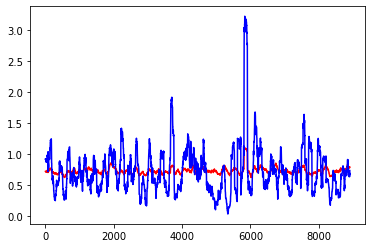

In [273]:
N = 100
plt.plot(np.convolve(pred, np.ones((N,))/N, mode='valid'), color = 'red')
plt.plot(np.convolve(y, np.ones((N,))/N, mode='valid'), color = 'blue')

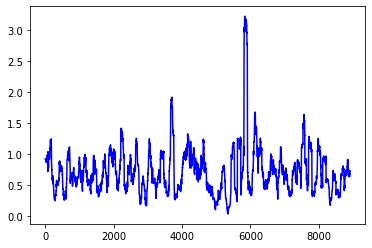

In [583]:
plt.plot(np.convolve(y, np.ones((N,))/N, mode='valid'), color = 'blue')

In [600]:
rs['Temp'] = rs['Temp'].astype(float)
rs['Temp'] =rs['Temp'].interpolate(method='time')

In [601]:
rse = rs.resample('1D').mean()
temp = [rse] + [rse.shift(i) for i in range(1,10)]
rse = pd.concat(temp, axis=1)

X = rse.iloc[100:-1, :]
y = (rs['Temp'].resample('1D').mean()).shift(-1)>0
y = y.interpolate(method ='bfill')
y = y[100:-1].astype('int')

print(X.shape)
print(y.shape)

l_ = evaluate_models(get_models())
l_ = evaluate_models(get_models3())

(8911, 180)
(8911,)
Defined 8 models
lr: Loss: -0.532 (+/- 1.116)
lasso: Loss: -0.029 (+/- 0.056)
ridge: Loss: -0.475 (+/- 1.003)
en: Loss: -0.029 (+/- 0.056)
huber: Loss: -6.274 (+/- 10.160)
llars: Loss: -0.029 (+/- 0.056)
pa: Loss: -0.280 (+/- 0.463)
sgd: Loss: -2045170980951869851487897032589312.000 (+/- 5876931000703670136903683893362688.000)
Defined 8 models
knn: Loss: -0.062 (+/- 0.198)
cart: Loss: -1.430 (+/- 4.244)
extra: Loss: -1.613 (+/- 2.531)
ada: Loss: -0.592 (+/- 2.319)
bag: Loss: -0.322 (+/- 1.291)
rf: Loss: -0.209 (+/- 0.854)
et: Loss: -0.110 (+/- 0.668)
gbm: Loss: 0.073 (+/- 0.248)


<a id='M2'></a>

## SARIMAX model

In [609]:
# SARIMAX example (Akaike Information Criterion)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
# fit model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(rs['Temp'].iloc[-1500:-500],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6720.5579489478605
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5859.198336251999
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4828.734145832056
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4685.913925061459
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4795.831415975139
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4727.674020237402
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4755.8375050559935
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4656.777304061421
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5420.9325571032605
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4603.614355381862
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3702.794559838696
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3566.626743702842
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3665.5788339708683
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3596.070028662496
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3645.059184613283
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3535.332892095103
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1509.8502583795826
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1495.7667969570234
ARIM

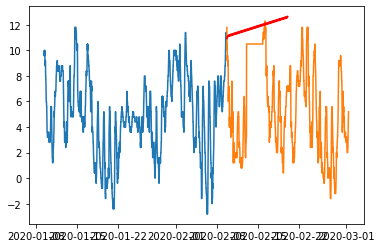

In [614]:
model = SARIMAX(rs['Temp'].iloc[-2500:-1000], order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(rs['Temp'].iloc[-2500:-1000]), len(rs['Temp'].iloc[-2500:-1000])+500)
plt.plot(rs['Temp'].iloc[-2500:-1000])
plt.plot(rs['Temp'].iloc[-1000:])
plt.plot(yhat,color='red')

<a id='M3'></a>

# Classification: Rain vs No Rain

In [615]:
rse = rs.resample('1D').mean()
rse['Day'] = pd.DatetimeIndex(rse.index).day
rse['Year'] = pd.DatetimeIndex(rse.index).year
X = rse.loc[:, :]
y = rse['Rain'].shift(-1)>0
y = y.interpolate(method ='bfill')
y = y.astype('int')

In [284]:
np.sum(y==1)/len(y)

0.5560363959165557

In [285]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print(X_train.shape)

(8193, 19)


In [299]:
def evaluate_models(models):
    score_list = []
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='accuracy')
        print(name + ": Accuracy: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))
        score_list.append(scores.mean())
        scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='roc_auc')
        print(name + ": AUC: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))
        score_list.append(scores.mean())
    return score_list

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# prepare a list of ml models
def get_models(models=dict()):
    # non-linear models
    models['mlp'] = MLPClassifier()
    models['knn'] = KNeighborsClassifier(n_neighbors=7)
    models['cart'] = DecisionTreeClassifier()
    #models['svc'] = SVC()
    #models['gp'] = GaussianProcessClassifier()
    models['gm'] = GaussianNB()
    # # ensemble models
    n_trees = 50
    models['dt'] = DecisionTreeClassifier()
    models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
    models['bag'] = BaggingClassifier(n_estimators=n_trees)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models


In [300]:
l2_ = evaluate_models(get_models())

Defined 10 models
mlp: Loss: 0.581 (+/- 0.057)
mlp: Loss: 0.643 (+/- 0.052)
knn: Loss: 0.604 (+/- 0.029)
knn: Loss: 0.627 (+/- 0.031)
cart: Loss: 0.581 (+/- 0.029)
cart: Loss: 0.562 (+/- 0.025)
gm: Loss: 0.610 (+/- 0.030)
gm: Loss: 0.647 (+/- 0.038)
dt: Loss: 0.575 (+/- 0.031)
dt: Loss: 0.557 (+/- 0.021)
ada: Loss: 0.648 (+/- 0.022)
ada: Loss: 0.681 (+/- 0.027)
bag: Loss: 0.635 (+/- 0.029)
bag: Loss: 0.672 (+/- 0.026)
rf: Loss: 0.635 (+/- 0.035)
rf: Loss: 0.678 (+/- 0.030)
et: Loss: 0.623 (+/- 0.045)
et: Loss: 0.660 (+/- 0.029)
gbm: Loss: 0.656 (+/- 0.029)
gbm: Loss: 0.700 (+/- 0.030)


<a id='M4'></a>

## Add lagged features:


In [525]:
rse = rs.resample('1D').mean()
temp = [rse] + [rse.shift(i) for i in range(1,10)]
rse = pd.concat(temp, axis=1)

X = rse.iloc[100:-1, :]
y = (rs.resample('1D').mean())['Rain'].shift(-1)>0
y = y.interpolate(method ='bfill')
y = y[100:-1].astype('int')

print(X.shape)
print(y.shape)

(8911, 170)
(8911,)


In [374]:
rse.iloc[100:-1, :]['Rain'].head()

Rain      Rain      Rain      Rain      Rain      Rain  \
t                                                                        
1995-10-08  0.008542  0.401875  0.326667  0.006667  0.612917  0.000000   
1995-10-09  0.000000  0.008542  0.401875  0.326667  0.006667  0.612917   
1995-10-10  0.005625  0.000000  0.008542  0.401875  0.326667  0.006667   
1995-10-11  0.000000  0.005625  0.000000  0.008542  0.401875  0.326667   
1995-10-12  0.005833  0.000000  0.005625  0.000000  0.008542  0.401875   

                Rain      Rain      Rain      Rain  ...      Rain      Rain  \
t                                                   ...                       
1995-10-08  0.017083  0.407292  0.093542  0.072500  ...  0.000000  0.000000   
1995-10-09  0.000000  0.017083  0.407292  0.093542  ...  0.038125  0.000000   
1995-10-10  0.612917  0.000000  0.017083  0.407292  ...  0.004583  0.038125   
1995-10-11  0.006667  0.612917  0.000000  0.017083  ...  0.504375  0.004583   
1995-10-12  0.326667  0.006667  0.612917  0.000000  ...  0.376875  0.504375   

                Rain      Rain  Rain  Rain  Rain      Rain      Rain      Rain  
t                                                                               
1995-10-08  0.000000  0.000000   0.0   0.0   0.0  0.004167  1.828333  0.000000  
1995-10-09  0.000000  0.000000   0.0   0.0   0.0  0.000000  0.004167  1.828333  
1995-10-10  0.000000  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.004167  
1995-10-11  0.038125  0.000000   0.0   0.0   0.0  0.000000  0.000000  0.000000  
1995-10-12  0.004583  0.038125   0.0   0.0   0.0  0.000000  0.000000  0.000000  

[5 rows x 100 columns]

In [441]:
# 1700 features are a lot!
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Lose minimum infomation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [427]:
gbm = GradientBoostingClassifier(n_estimators=50) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='accuracy')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

WindSp: Loss: 0.662 (+/- 0.022)


In [448]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#sk = SelectKBest(chi2, k=20).fit(X_train, y_train)
#X_train = sk.transform(X_train)
gbm = GradientBoostingClassifier(n_estimators=50) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='accuracy')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import accuracy_score
gbm.fit(X_train,y_train)
accuracy_score(y_test, gbm.predict(X_test))

WindSp: Loss: 0.665 (+/- 0.024)


0.6506172839506172

In [450]:
accuracy_score(y_train, gbm.predict(X_train))

0.7179360572768794

In [476]:

rse.iloc[:,gbm.feature_importances_.argsort()[-20:][::-1]]

Rain        Press      Rain      Rain      Rain      Rain  \
t                                                                           
1995-06-30  0.000000  1014.437500       NaN       NaN       NaN       NaN   
1995-07-01  0.000000  1018.187500  0.000000       NaN       NaN       NaN   
1995-07-02  1.828333  1009.187500  0.000000  0.000000       NaN       NaN   
1995-07-03  0.004167  1006.000000  1.828333  0.000000       NaN       NaN   
1995-07-04  0.000000  1014.020833  0.004167  1.828333  0.000000       NaN   
...              ...          ...       ...       ...       ...       ...   
2020-02-26  0.002708  1000.437500  0.551667  0.813125  0.026458  0.370625   
2020-02-27  3.882708  1001.500000  0.002708  0.551667  2.828333  2.302708   
2020-02-28  0.966667  1002.458333  3.882708  0.002708  0.813125  0.000000   
2020-02-29  1.663542   980.812500  0.966667  3.882708  0.551667  0.026458   
2020-03-01  0.000000   983.000000  1.663542  0.966667  0.002708  2.828333   

                Rain  WindDr_S  WindDr_SE      Rain        Press        Press  \
t                                                                               
1995-06-30       NaN  0.000000   0.000000       NaN          NaN          NaN   
1995-07-01       NaN  0.062500   0.041667       NaN          NaN          NaN   
1995-07-02       NaN  0.000000   0.000000       NaN          NaN          NaN   
1995-07-03       NaN  0.020833   0.000000       NaN          NaN          NaN   
1995-07-04       NaN  0.041667   0.000000       NaN          NaN          NaN   
...              ...       ...        ...       ...          ...          ...   
2020-02-26  0.000000  0.000000   0.000000  0.317500  1016.312500  1008.812500   
2020-02-27  0.026458  0.062500   0.229167  0.370625  1008.812500  1019.687500   
2020-02-28  2.828333  0.500000   0.395833  2.302708  1019.687500  1014.916667   
2020-02-29  0.813125  0.520833   0.000000  0.000000  1014.916667  1014.916667   
2020-03-01  0.551667  0.090909   0.000000  0.026458  1014.916667  1007.145833   

                Rain      Rain        Press  WindDr_SE      Rain        Press  \
t                                                                               
1995-06-30       NaN       NaN          NaN        NaN       NaN          NaN   
1995-07-01       NaN       NaN  1014.437500        NaN       NaN          NaN   
1995-07-02       NaN       NaN  1018.187500        NaN       NaN          NaN   
1995-07-03       NaN  0.000000  1009.187500        NaN       NaN          NaN   
1995-07-04       NaN  0.000000  1006.000000   0.000000       NaN          NaN   
...              ...       ...          ...        ...       ...          ...   
2020-02-26  2.302708  2.828333   996.458333   0.000000  0.032500  1019.687500   
2020-02-27  0.000000  0.813125  1000.437500   0.020833  0.317500  1014.916667   
2020-02-28  0.026458  0.551667  1001.500000   0.208333  0.370625  1014.916667   
2020-02-29  2.828333  0.002708  1002.458333   0.000000  2.302708  1007.145833   
2020-03-01  0.813125  3.882708   980.812500   0.000000  0.000000   996.458333   

            WindDr_SE  WindDr_SE  
t                                 
1995-06-30        NaN        NaN  
1995-07-01        NaN        NaN  
1995-07-02        NaN        NaN  
1995-07-03        NaN        NaN  
1995-07-04        NaN        NaN  
...               ...        ...  
2020-02-26        0.0        0.0  
2020-02-27        0.0        0.0  
2020-02-28        0.0        0.0  
2020-02-29        0.0        0.0  
2020-03-01        0.0        0.0  

[9012 rows x 20 columns]

In [620]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
rse = rs[['Rain','Press','WindDr_SE','WindDr_S']].resample('1D').mean()
temp = [rse] + [rse.shift(i) for i in range(1,100)]
rse = pd.concat(temp, axis=1)

X = rse.iloc[100:-1, :]
y = (rs.resample('1D').mean())['Rain'].shift(-1)>0
y = y.interpolate(method ='bfill')
y = y[100:-1].astype('int')

print(X.shape)
print(y.shape)
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)    

#sk = SelectKBest(chi2, k=20).fit(X_train, y_train)
#X_train = sk.transform(X_train)
clf1 = BaggingClassifier(n_estimators=70)
clf2 = RandomForestClassifier(n_estimators=70, random_state=1)
clf3 = GradientBoostingClassifier(n_estimators=70,random_state=0) 
gbm = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')#GradientBoostingClassifier(n_estimators=70) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='accuracy')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import accuracy_score
gbm.fit(X_train,y_train)
print(accuracy_score(y_test, gbm.predict(X_test)))

scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='roc_auc')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, gbm.predict(X_test)))

(8911, 400)
(8911,)
Gradient Boosting : Loss: 0.653 (+/- 0.026)
0.7049382716049383


KeyboardInterrupt: 

In [621]:
print(roc_auc_score(y_test, gbm.predict(X_test)))

0.6672189601379765


In [499]:
gbm = GradientBoostingClassifier(n_estimators=70,
                                               random_state=0) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='accuracy')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import accuracy_score
gbm.fit(X_train,y_train)
print(accuracy_score(y_test, gbm.predict(X_test)))

scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='roc_auc')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, gbm.predict(X_test)))

Gradient Boosting : Loss: 0.656 (+/- 0.030)
0.7135802469135802
Gradient Boosting : Loss: 0.687 (+/- 0.032)
0.6779257019940701


In [537]:
from sklearn.model_selection import cross_val_predict
gbm = GradientBoostingClassifier(n_estimators=70,
                                               random_state=0) 
gbm.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<a id='N1'></a>

## Plotting!	
sklearn.metrics.plot_confusion_matrix(estimator, X, y)  
	metrics.plot_roc_curve(clf, X_test, y_test)  
	sklearn.metrics.ConfusionMatrixDisplay  
	sklearn.metrics.RocCurveDisplay(fpr, tpr, roc_auc, estimator_name)  
    
    


[Text(167.4, 190.26, 'X[5] <= 0.0\nfriedman_mse = 0.247\nsamples = 8911\nvalue = -0.0'),
 Text(83.7, 135.9, 'X[2] <= 1019.115\nfriedman_mse = 0.236\nsamples = 3951\nvalue = -0.174'),
 Text(41.85, 81.53999999999999, 'X[73] <= 0.0\nfriedman_mse = 0.25\nsamples = 1862\nvalue = -0.071'),
 Text(20.925, 27.180000000000007, 'friedman_mse = 0.24\nsamples = 957\nvalue = -0.625'),
 Text(62.775000000000006, 27.180000000000007, 'friedman_mse = 0.245\nsamples = 905\nvalue = 0.068'),
 Text(125.55000000000001, 81.53999999999999, 'X[22] <= 0.0\nfriedman_mse = 0.206\nsamples = 2089\nvalue = -0.266'),
 Text(104.625, 27.180000000000007, 'friedman_mse = 0.182\nsamples = 1410\nvalue = -1.287'),
 Text(146.475, 27.180000000000007, 'friedman_mse = 0.24\nsamples = 679\nvalue = -0.638'),
 Text(251.10000000000002, 135.9, 'X[2] <= 1014.885\nfriedman_mse = 0.212\nsamples = 4960\nvalue = 0.139'),
 Text(209.25, 81.53999999999999, 'X[73] <= 0.001\nfriedman_mse = 0.189\nsamples = 3154\nvalue = 0.19'),
 Text(188.325000

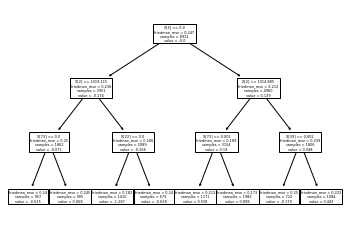

In [540]:
from sklearn.tree import export_graphviz

sub_tree = gbm.estimators_[0, 0]

from sklearn import tree
tree.plot_tree(sub_tree)

In [532]:
predicted

array([0.60864198, 0.68765432, 0.69259259, 0.59876543, 0.68518519,
       0.66296296, 0.69012346, 0.66419753, 0.67901235, 0.70493827])

In [474]:
np.sum(y_train)/len(y_train)

0.5504258733489693

Confusion matrix, without normalization
[[155 149]
 [ 94 393]]


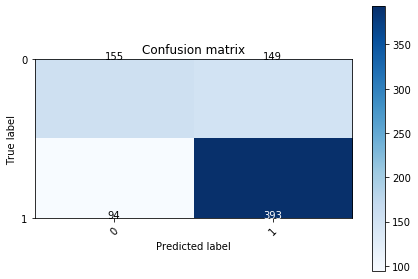

In [479]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_matrix(y_test,gbm.predict(X_test)),['0','1'])


<a id='M5'></a>

# With multiple output

In [616]:
rse = rs[['Rain','Press','WindDr_SE','WindDr_S']].resample('1D').mean()
temp = [rse] + [rse.shift(i) for i in range(1,10)]
rse = pd.concat(temp, axis=1)

X = rse.iloc[100:-40, :]
y = [(rs.resample('1D').mean())['Rain'].shift(-i)>0 for i in range(30)]
y = pd.concat(y, axis=1)
y = y[100:-40].astype('int')

print(X.shape)
print(y.shape)

(8872, 40)
(8872, 30)


In [542]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)    

#sk = SelectKBest(chi2, k=20).fit(X_train, y_train)
#X_train = sk.transform(X_train)
gbm = RandomForestClassifier(n_estimators=70) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='f1_macro')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import accuracy_score
gbm.fit(X_train,y_train)
print(np.sum(np.sum(y_test == gbm.predict(X_test)))/(y_test.shape[0]*y_test.shape[1]))

scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='precision_macro')
print('Gradient Boosting ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, gbm.predict(X_test)))

Gradient Boosting : Loss: 0.617 (+/- 0.095)
0.5998345740281225
Gradient Boosting : Loss: 0.570 (+/- 0.098)
0.5431765286894098


In [543]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)    

#sk = SelectKBest(chi2, k=20).fit(X_train, y_train)
#X_train = sk.transform(X_train)
gbm = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=70))
#scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='accuracy')
#print('Gradient Boosting Accuracy ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import accuracy_score
gbm.fit(X_train,y_train)
print(np.sum(np.sum(y_test == gbm.predict(X_test)))/(y_test.shape[0]*y_test.shape[1]))

#scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='roc_auc')
#print('Gradient Boosting ROC AUC ' + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, gbm.predict(X_test)))

0.623490488006617
0.5526838925985514


In [524]:
from sklearn.linear_model import LogisticRegression
#lg = MultiOutputClassifier(LogisticRegression(random_state=0,penalty = 'elasticnet',solver='saga',l1_ratio = 0.1))
lg = MultiOutputClassifier(LogisticRegression(random_state=0))
lg.fit(X_train,y_train)
print(np.sum(np.sum(y_test == lg.predict(X_test)))/(y_test.shape[0]*y_test.shape[1]))
print(roc_auc_score(y_test, lg.predict(X_test)))

0.6146815550041357
0.5402652545462655


In [516]:
np.sum(np.sum(y_test == gbm.predict(X_test)))/(y_test.shape[0]*y_test.shape[1])

0.6187758478081059

In [507]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [428]:
et = ExtraTreesClassifier(n_estimators=50) 
scores = cross_val_score(et, X_train, y_train, cv=tscv, scoring='accuracy')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

WindSp: Loss: 0.589 (+/- 0.030)


In [388]:
gbm = GradientBoostingClassifier(n_estimators=500) 
scores = cross_val_score(gbm, X_train, y_train, cv=tscv, scoring='roc_auc')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

WindSp: Loss: 0.681 (+/- 0.027)


In [381]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
regr = SGDClassifier(loss="log", penalty="elasticnet")
scores = cross_val_score(regr, X_train, y_train, cv=tscv, scoring='roc_auc')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

WindSp: Loss: 0.584 (+/- 0.036)


In [362]:
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)
l_ = evaluate_models(get_models())

Defined 10 models


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

mlp: Loss: 0.537 (+/- 0.032)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

mlp: Loss: 0.527 (+/- 0.037)
knn: Loss: 0.526 (+/- 0.028)
knn: Loss: 0.522 (+/- 0.034)
cart: Loss: 0.500 (+/- 0.034)
cart: Loss: 0.511 (+/- 0.031)
gm: Loss: 0.514 (+/- 0.056)
gm: Loss: 0.530 (+/- 0.050)
dt: Loss: 0.508 (+/- 0.034)
dt: Loss: 0.512 (+/- 0.035)
ada: Loss: 0.528 (+/- 0.046)
ada: Loss: 0.513 (+/- 0.036)
bag: Loss: 0.524 (+/- 0.032)
bag: Loss: 0.531 (+/- 0.031)
rf: Loss: 0.516 (+/- 0.047)
rf: Loss: 0.520 (+/- 0.036)
et: Loss: 0.529 (+/- 0.038)
et: Loss: 0.534 (+/- 0.036)
gbm: Loss: 0.535 (+/- 0.047)
gbm: Loss: 0.537 (+/- 0.037)


In [395]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [482]:
X_train.shape

(8101, 400)

In [483]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
X_train = np.array(X_train).reshape((len(X_train), 100,4))
y_train = np.array(y_train)
X_test = np.array(X_test).reshape((len(X_test), 100,4))
y_test = np.array(y_test)
model = Sequential()
model.add(LSTM(32, return_sequences=True,recurrent_dropout = 0.25,dropout = 0.25, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(LSTM(32, return_sequences=True,recurrent_dropout = 0.25,dropout = 0.25, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(LSTM(32,recurrent_dropout = 0.25,dropout = 0.25, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 8101 samples, validate on 810 samples
Epoch 1/2
8101/8101 [==============================] - 63s 8ms/sample - loss: 2.4261 - AUC: 0.4912 - val_loss: 1.6615 - val_AUC: 0.5000
Epoch 2/2
8101/8101 [==============================] - 35s 4ms/sample - loss: 1.4358 - AUC: 0.5041 - val_loss: 1.2627 - val_AUC: 0.5000


In [484]:
scores

[1.2627032194608523, 0.5]

In [ ]:

from sklearn import cluster
agglo = cluster.FeatureAgglomeration(n_clusters=32)

In [367]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.08 * (1 - .8)))
X_train = sel.fit_transform(X_train)
X_train.shape

(8101, 900)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', RandomForestClassifier())
])

In [352]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_train.shape    

(8101, 461)

In [368]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
X_train.shape

(8101, 2)

In [369]:
rf = RandomForestClassifier(n_estimators=50) 
scores = cross_val_score(rf, X_train, y_train, cv=tscv, scoring='roc_auc')
print(name + ": Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

WindSp: Loss: 0.547 (+/- 0.028)
